In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import xarray 
import numpy as np
import logging
from netCDF4 import Dataset




    # Ideally would use SSH, but some diag_tables only saved zos----for coupled waves
pp_root_wave="/archive/Qian.Xiao/Qian.Xiao/FMS_Wave_Coupling_ZC/c5/postProcessing/NWA12.COBALT_wave/"
ww3= Dataset(pp_root_wave+"19930101_results/ww3.19930101.nc")
ww3_usp=Dataset(pp_root_wave+"19930101_results/ww3.19930101_usp.nc")

# ssh_wave=ocean_daily_wave.variables['ssh']
# t_wave=ocean_daily_wave.variables['time']
# model_grid_x = ocean_daily_wave.variables['xh']
# model_grid_y = ocean_daily_wave.variables['yh']

In [3]:
ww3_usp

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    WAVEWATCH_III_version_number: 6.07
    WAVEWATCH_III_switches: F90 NCO NOGRB DIST MPI PR3 UQ ST4 STAB0 FLX0 LN1 NL1 IC0 IS0 REF0 BT1 DB1 MLIM TR0 BS0 XX0 WNX1 WNT1 CRX1 CRT1 O0 O1 O2 O4 O5 O6 O7
    SIN4 namelist parameter BETAMAX: 1.55
    product_name: ww3.199301_usp.nc
    area: Regional Grid
    latitude_resolution: n/a
    longitude_resolution: n/a
    southernmost_latitude: 5.
    northernmost_latitude: 58.
    westernmost_longitude: -98.
    easternmost_longitude: -36.
    minimum_altitude: -12000 m
    maximum_altitude: 9000 m
    altitude_resolution: n/a
    start_date: 1993-01-01 00:00:00
    stop_date: 1993-01-31 23:00:00
    dimensions(sizes): level(1), longitude(775), latitude(845), f(3), time(744)
    variables(dimensions): float32 longitude(latitude, longitude), float32 latitude(latitude, longitude), float32 f(f), float64 time(time), int16 MAPSTA(latitude, longitude), flo

In [4]:
ww3

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    WAVEWATCH_III_version_number: 6.07
    WAVEWATCH_III_switches: F90 NCO NOGRB DIST MPI PR3 UQ ST4 STAB0 FLX0 LN1 NL1 IC0 IS0 REF0 BT1 DB1 MLIM TR0 BS0 XX0 WNX1 WNT1 CRX1 CRT1 O0 O1 O2 O4 O5 O6 O7
    SIN4 namelist parameter BETAMAX: 1.55
    product_name: ww3.199301.nc
    area: Regional Grid
    latitude_resolution: n/a
    longitude_resolution: n/a
    southernmost_latitude: 5.
    northernmost_latitude: 58.
    westernmost_longitude: -98.
    easternmost_longitude: -36.
    minimum_altitude: -12000 m
    maximum_altitude: 9000 m
    altitude_resolution: n/a
    start_date: 1993-01-01 00:00:00
    stop_date: 1993-01-31 23:00:00
    dimensions(sizes): level(1), longitude(775), latitude(845), time(744)
    variables(dimensions): float32 longitude(latitude, longitude), float32 latitude(latitude, longitude), float64 time(time), int16 MAPSTA(latitude, longitude), float32 ucur(time, latitude

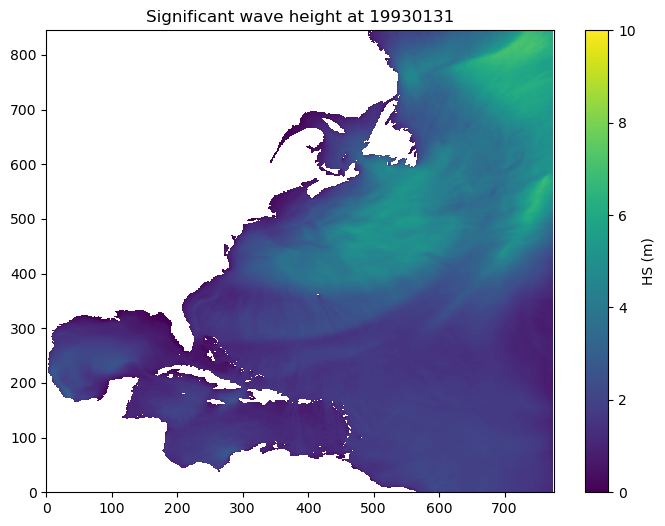

In [7]:
t = ww3.variables['time']
lon=ww3.variables['longitude']
lat=ww3.variables['latitude']
hs = ww3.variables['hs']

time=61
fig = plt.figure(figsize=(18,6))
gs = fig.add_gridspec(1,2)

ax = fig.add_subplot(gs[0])
plths=plt.pcolormesh(hs[time,:,:], vmin=0, vmax=10)
ax.set_title(f"Significant wave height at 19930131")
fig.colorbar(plths, ax=ax, orientation='vertical', label='HS (m)')

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.animation as animation
import math
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_aspect('equal')

# min=hs.min()
# max=hs.max()
min=0
max=10
cax = ax.imshow(hs[1,:,:], cmap='viridis',vmin=min,vmax=max)
cbar = fig.colorbar(cax)

def animate(i):
    ax.clear() 
    # t=str(t[i])
    # index = t.split("'")[1]
    # index=index.split("T")[0] 
    t_index=19930101
    t_index=t_index+math.floor((i-1)/2)

  
    plths = ax.pcolormesh(hs[i,:,:], vmin=min, vmax=max)
    plt.title(f"Significant wave height at date {t_index}")

    return plths,

ani = FuncAnimation(fig, animate, frames=len(t), blit=False)

writergif = animation.PillowWriter(fps=30)
ani.save('Hs_ani.gif', writer=writergif)
# ani.save('HS_ani.gif',writer='writergif', fps=5, dpi=100)
HTML(ani.to_jshtml())

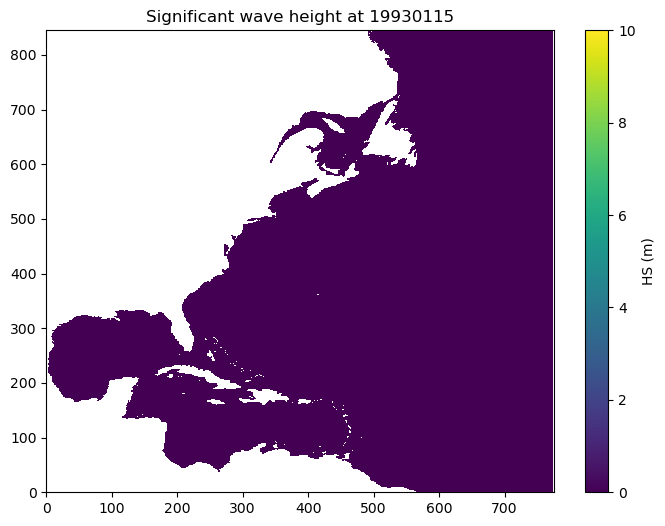

In [6]:

time=30
fig = plt.figure(figsize=(18,6))
gs = fig.add_gridspec(1,2)

ax = fig.add_subplot(gs[0])
plths=plt.pcolormesh(hs[time,:,:], vmin=0, vmax=10)
ax.set_title(f"Significant wave height at 19930115")
fig.colorbar(plths, ax=ax, orientation='vertical', label='HS (m)')

ModuleNotFoundError: No module named 'statsmodels'